In [3]:
import pandas as pd
import numpy as np

In [2]:
dataset = pd.read_csv('techmart_supply_chain_data.csv')
dataset

,Product_ID,Product_Name,Category,Demand,Inventory,Supplier_ID,Supplier_Name,Supplier_Cost,Lead_Time,Holding_Cost,Order_Cost,Date
0,P956,Laptop,Electronics,354,22,S001,GlobalTech Supplies,500,7,10,100,2024-03-19
1,P342,Smartphone,Electronics,352,38,S002,ElectroWorld Distributors,300,3,8,100,2024-07-25
2,P880,Tablet,Electronics,226,38,S002,ElectroWorld Distributors,200,14,5,100,2024-03-05
3,P358,Smartphone,Electronics,104,97,S003,GadgetHub Inc.,300,13,8,100,2024-12-17
4,P965,Smartphone,Electronics,187,76,S001,GlobalTech Supplies,300,13,8,100,2024-03-19
...,...,...,...,...,...,...,...,...,...,...,...,...
995,P097,Smartphone,Electronics,200,39,S001,GlobalTech Supplies,300,13,8,100,2024-12-28
996,P706,Smartphone,Electronics,151,44,S001,GlobalTech Supplies,300,8,8,100,2024-11-06
997,P686,Smartphone,Electronics,211,92,S001,GlobalTech Supplies,300,3,8,100,2024-03-06
998,P218,Smartphone,Electronics,169,61,S002,ElectroWorld Distributors,300,13,8,100,2024-10-04



| **Kolom**         | **Deskripsi**                                                                 |
|--------------------|-------------------------------------------------------------------------------|
| **Product_ID**     | ID unik untuk setiap produk.                                                 |
| **Product_Name**   | Nama produk (Laptop, Smartphone, Tablet).                                    |
| **Category**       | Kategori produk (Electronics).                                               |
| **Demand**         | Jumlah permintaan produk per bulan.                                          |
| **Inventory**      | Jumlah stok yang tersedia saat ini.                                          |
| **Supplier_ID**    | ID pemasok.                                                                  |
| **Supplier_Name**  | Nama pemasok.                                                                |
| **Supplier_Cost**  | Biaya per unit dari pemasok.                                                 |
| **Lead_Time**      | Waktu pengiriman dari pemasok (dalam hari).                                  |
| **Holding_Cost**   | Biaya penyimpanan per unit per bulan.                                        |
| **Order_Cost**     | Biaya pemesanan per order (fixed).                                           |
| **Date**           | Tanggal pencatatan data.                                                     |

## Pertanyaan Analisis (Analytics Questions)
1. Berapa **jumlah pesanan optimal (EOQ)** untuk setiap produk?
2. Berapa **total biaya** yang harus dikeluarkan untuk setiap produk?
3. Bagaimana **lead time** memengaruhi tingkat inventaris?
4. Apakah ada pola **permintaan musiman** yang dapat diidentifikasi?
5. Bagaimana cara mengoptimalkan **tingkat inventaris** untuk menghindari stockout dan kelebihan stok?

In [20]:
dataset['Supplier_Name'].nunique()

3

In [18]:
# EOQ = sqrt((2 * fixed cost to purchase * demand per time) / inventory carrying cost per unit per time)  
# Total cost = ((demand / EOQ ) * order cost) + ((EOQ/2) * holding cost)
dataset['EOQ'] = np.sqrt((2 * dataset['Order_Cost'] * dataset['Demand']) / dataset['Holding_Cost'])
dataset['Total_Cost'] = ((dataset['Demand']/dataset['EOQ'])*dataset['Order_Cost']) + (dataset['EOQ'] * dataset['Holding_Cost'] / 2)

dataset[['Product_ID', 'Product_Name', 'EOQ', 'Total_Cost']]

,Product_ID,Product_Name,EOQ,Total_Cost
0,P956,Laptop,84.142736,841.427359
1,P342,Smartphone,93.808315,750.466522
2,P880,Tablet,95.078915,475.394573
3,P358,Smartphone,50.990195,407.921561
4,P965,Smartphone,68.373972,546.991773
...,...,...,...,...
995,P097,Smartphone,70.710678,565.685425
996,P706,Smartphone,61.441029,491.528229
997,P686,Smartphone,72.629195,581.033562
998,P218,Smartphone,65.000000,520.000000



## Apa itu Lead Time?
Lead Time adalah waktu yang dibutuhkan sejak pemesanan dilakukan hingga barang atau bahan baku diterima. Dalam manajemen rantai pasok, lead time berperan penting dalam menentukan efisiensi operasional dan ketersediaan stok.

## Mengapa Lead Time Penting?

### 1. Menghindari Stockout
Jika lead time terlalu lama, stok bisa habis sebelum pesanan baru tiba, yang dapat menyebabkan:
- Kehilangan penjualan
- Gangguan dalam operasional
- Ketidakpuasan pelanggan

### 2. Mengurangi Kelebihan Stok
Lead time yang lebih pendek memungkinkan perusahaan untuk:
- Memesan lebih sering dengan jumlah lebih sedikit
- Mengurangi biaya penyimpanan dan risiko barang kadaluarsa atau usang
- Meningkatkan efisiensi modal kerja

### 3. Perencanaan yang Lebih Baik
Dengan memahami lead time, perusahaan dapat:
- Merencanakan jadwal pemesanan dan produksi secara lebih akurat
- Menghindari keterlambatan produksi akibat bahan baku yang belum tersedia
- Mengoptimalkan rantai pasok untuk meningkatkan profitabilitas


In [19]:
# Bagaimana lead time mempengaruhi tingkat inventaris
# Hitung rata-rata lead time per supplier
lead_time_analysis = dataset.groupby('Supplier_Name')['Lead_Time'].mean().reset_index()
print(lead_time_analysis)

               Supplier_Name  Lead_Time
0  ElectroWorld Distributors   8.616667
1             GadgetHub Inc.   8.533520
2        GlobalTech Supplies   8.614035


In [24]:
# Ambang batas lead time (misalnya 7 hari)
lead_time_threshold = 8

# Identifikasi produk dengan lead time di atas ambang batas
high_lead_time_products = dataset[dataset['Lead_Time'] > lead_time_threshold]
high_lead_time_products[['Product_ID', 'Product_Name', 'Supplier_Name', 'Lead_Time']]

,Product_ID,Product_Name,Supplier_Name,Lead_Time
2,P880,Tablet,ElectroWorld Distributors,14
3,P358,Smartphone,GadgetHub Inc.,13
4,P965,Smartphone,GlobalTech Supplies,13
6,P908,Smartphone,GlobalTech Supplies,13
9,P213,Laptop,GadgetHub Inc.,9
...,...,...,...,...
990,P620,Smartphone,GadgetHub Inc.,12
991,P861,Tablet,GadgetHub Inc.,13
995,P097,Smartphone,GlobalTech Supplies,13
998,P218,Smartphone,ElectroWorld Distributors,13


In [26]:
from scipy.stats import norm
# reorder poin
# Hitung safety stock (Z-score untuk service level 95%)
z_score = norm.ppf(0.95)
dataset['Safety_Stock'] = z_score * np.sqrt(dataset['Lead_Time']) * dataset['Demand'].std()

# Hitung reorder point
dataset['Reorder_Point'] = (dataset['Demand'] * dataset['Lead_Time']) + dataset['Safety_Stock']

# Tampilkan hasil
dataset[['Product_ID', 'Product_Name', 'Lead_Time', 'Reorder_Point']].head()

,Product_ID,Product_Name,Lead_Time,Reorder_Point
0,P956,Laptop,7,3052.510677
1,P342,Smartphone,3,1432.105523
2,P880,Tablet,14,3976.480791
3,P358,Smartphone,13,2134.926080
4,P965,Smartphone,13,3213.926080


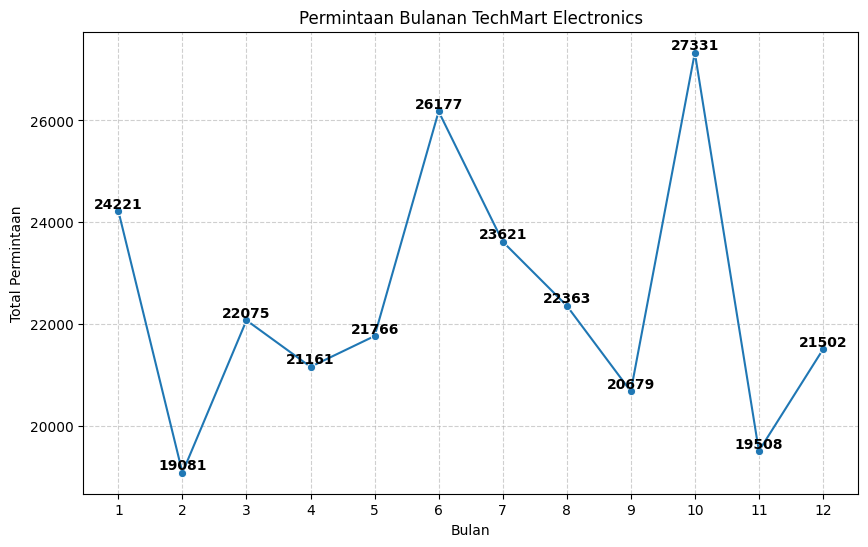

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Pastikan kolom 'Date' dalam format datetime
dataset['Date'] = pd.to_datetime(dataset['Date'])

# Ambil bulan dari tanggal
dataset['Month'] = dataset['Date'].dt.month

# Hitung total permintaan per bulan
monthly_demand = dataset.groupby('Month')['Demand'].sum().reset_index()

# Plot data
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='Month', y='Demand', data=monthly_demand, marker='o')

# Tambahkan label pada tiap titik
for i, row in monthly_demand.iterrows():
    plt.text(row['Month'], row['Demand'], f"{row['Demand']}", 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Tambahkan judul dan label sumbu
plt.title('Permintaan Bulanan TechMart Electronics')
plt.xlabel('Bulan')
plt.ylabel('Total Permintaan')
plt.xticks(range(1, 13))  # Pastikan bulan 1-12 ditampilkan dengan benar
plt.grid(True, linestyle='--', alpha=0.6)

# Tampilkan plot
plt.show()


**Optimasi tingkat inventaris**
Optimasi tingkat inventaris bertujuan untuk menghindari stockout dan kelebihan stok.


In [28]:
from scipy.stats import norm

# Hitung safety stock
z_score = norm.ppf(0.95)  # Z-score untuk service level 95%
dataset['Safety_Stock'] = z_score * np.sqrt(dataset['Lead_Time']) * dataset['Demand'].std()

# Hitung reorder point
dataset['Reorder_Point'] = (dataset['Demand'] * dataset['Lead_Time']) + dataset['Safety_Stock']

# Tampilkan hasil
dataset[['Product_ID', 'Product_Name', 'Safety_Stock', 'Reorder_Point']].head()

,Product_ID,Product_Name,Safety_Stock,Reorder_Point
0,P956,Laptop,574.510677,3052.510677
1,P342,Smartphone,376.105523,1432.105523
2,P880,Tablet,812.480791,3976.480791
3,P358,Smartphone,782.926080,2134.926080
4,P965,Smartphone,782.926080,3213.926080


## Metrik Kinerja (Key Performance Indicators - KPIs)
1. **Economic Order Quantity (EOQ):**  
   Jumlah pesanan optimal untuk setiap produk.

2. **Total Biaya:**  
   Biaya pemesanan + biaya penyimpanan.

3. **Service Level:**  
   Persentase permintaan pelanggan yang dapat dipenuhi tanpa stockout.

4. **Inventory Turnover Ratio:**  
   Seberapa cepat inventaris terjual dan diganti.

5. **Lead Time Variability:**  
   Variasi waktu pengiriman dari pemasok.

In [40]:
# Hitung service level
total_demand = dataset['Demand'].sum()
stockout = dataset[dataset['Inventory'] < dataset['Demand']]['Demand'].sum()
service_level = (1 - (stockout / total_demand)) * 100
print(f"Service Level: {service_level:.2f}% \nJika service level adalah 95%, artinya 95% permintaan pelanggan dapat dipenuhi tanpa stockout.")

# Hitung inventory turnover ratio
cost_of_goods_sold = (dataset['Demand'] * dataset['Supplier_Cost']).sum()
average_inventory = dataset['Inventory'].mean()
inventory_turnover_ratio = cost_of_goods_sold / average_inventory
print(f"Inventory Turnover Ratio: {inventory_turnover_ratio:.2f}")

# Hitung lead time variability
lead_time_variability = dataset.groupby('Supplier_Name')['Lead_Time'].std().reset_index()
print(lead_time_variability)

Service Level: 0.94% 
Jika service level adalah 95%, artinya 95% permintaan pelanggan dapat dipenuhi tanpa stockout.
Inventory Turnover Ratio: 1612809.08
               Supplier_Name  Lead_Time
0  ElectroWorld Distributors   3.492427
1             GadgetHub Inc.   3.434500
2        GlobalTech Supplies   3.481435
